In [1]:
import numpy as np
import random
import os

from matplotlib import pyplot as plt

import pandas as pd
from tqdm.notebook import tqdm
%matplotlib inline
import matplotlib.pyplot as plt



from utils.augment import augment
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

from utils.deep import preProcess, smoothLabels, oneHot, applyOneHot, evaluate_set
from utils.visualize import showMe, showHistory
from utils.record import preProcess

%load_ext autoreload
%autoreload 2


C:\Users\Nemes\anaconda3\envs\tf\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Nemes\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Nemes\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Nemes\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [21]:
classes = ['Rest', 'Eyebrow','Smile', 'Chew']

clip_value = 2000
input_length = 100
root_path = 'C:/resources/EMG/'
post_fix = '_1s_augmented'
post_fix = '_3s'
include = ['S010']
train_sessions = []
for subject in os.listdir(root_path):
    if subject in include:
        for session in os.listdir(os.path.join(root_path,subject)):
            if session == 'session_4' and subject in exclude_last:
                continue
            train_sessions.append(os.path.join(root_path,subject, session))
        #print(f"{len(os.listdir(os.path.join(root_path,subject)))} session loaded from subject: {subject}")
print(f"{len(train_sessions)} sessions loaded for training")


#ACTUALLY LOAD TRAIN DATA
records = {}
for c in classes:
    class_data = []
    for session in train_sessions:
        class_data.append(np.load(os.path.join(session,c+post_fix+'.npy'),allow_pickle=True))
    records[c] = np.concatenate(class_data)

    records[c]  = np.array([preProcess(s,clip_value,300) for s in records[c] ])





4 sessions loaded for training


In [22]:
def showMe(data, r=[-1,1]):
    plt.rcParams["figure.figsize"] = [17, 17*3]
   
    fig, ax = plt.subplots(facecolor ='#A0A0A0')
    ax.set_ylim(r[0], r[1])
    i = 0

    for i in range(75):
        plt.subplot(15, 5, i+1)
        for d in data[i]:
            plt.plot(d)
            plt.ylim(r[0], r[1])
    plt.show()

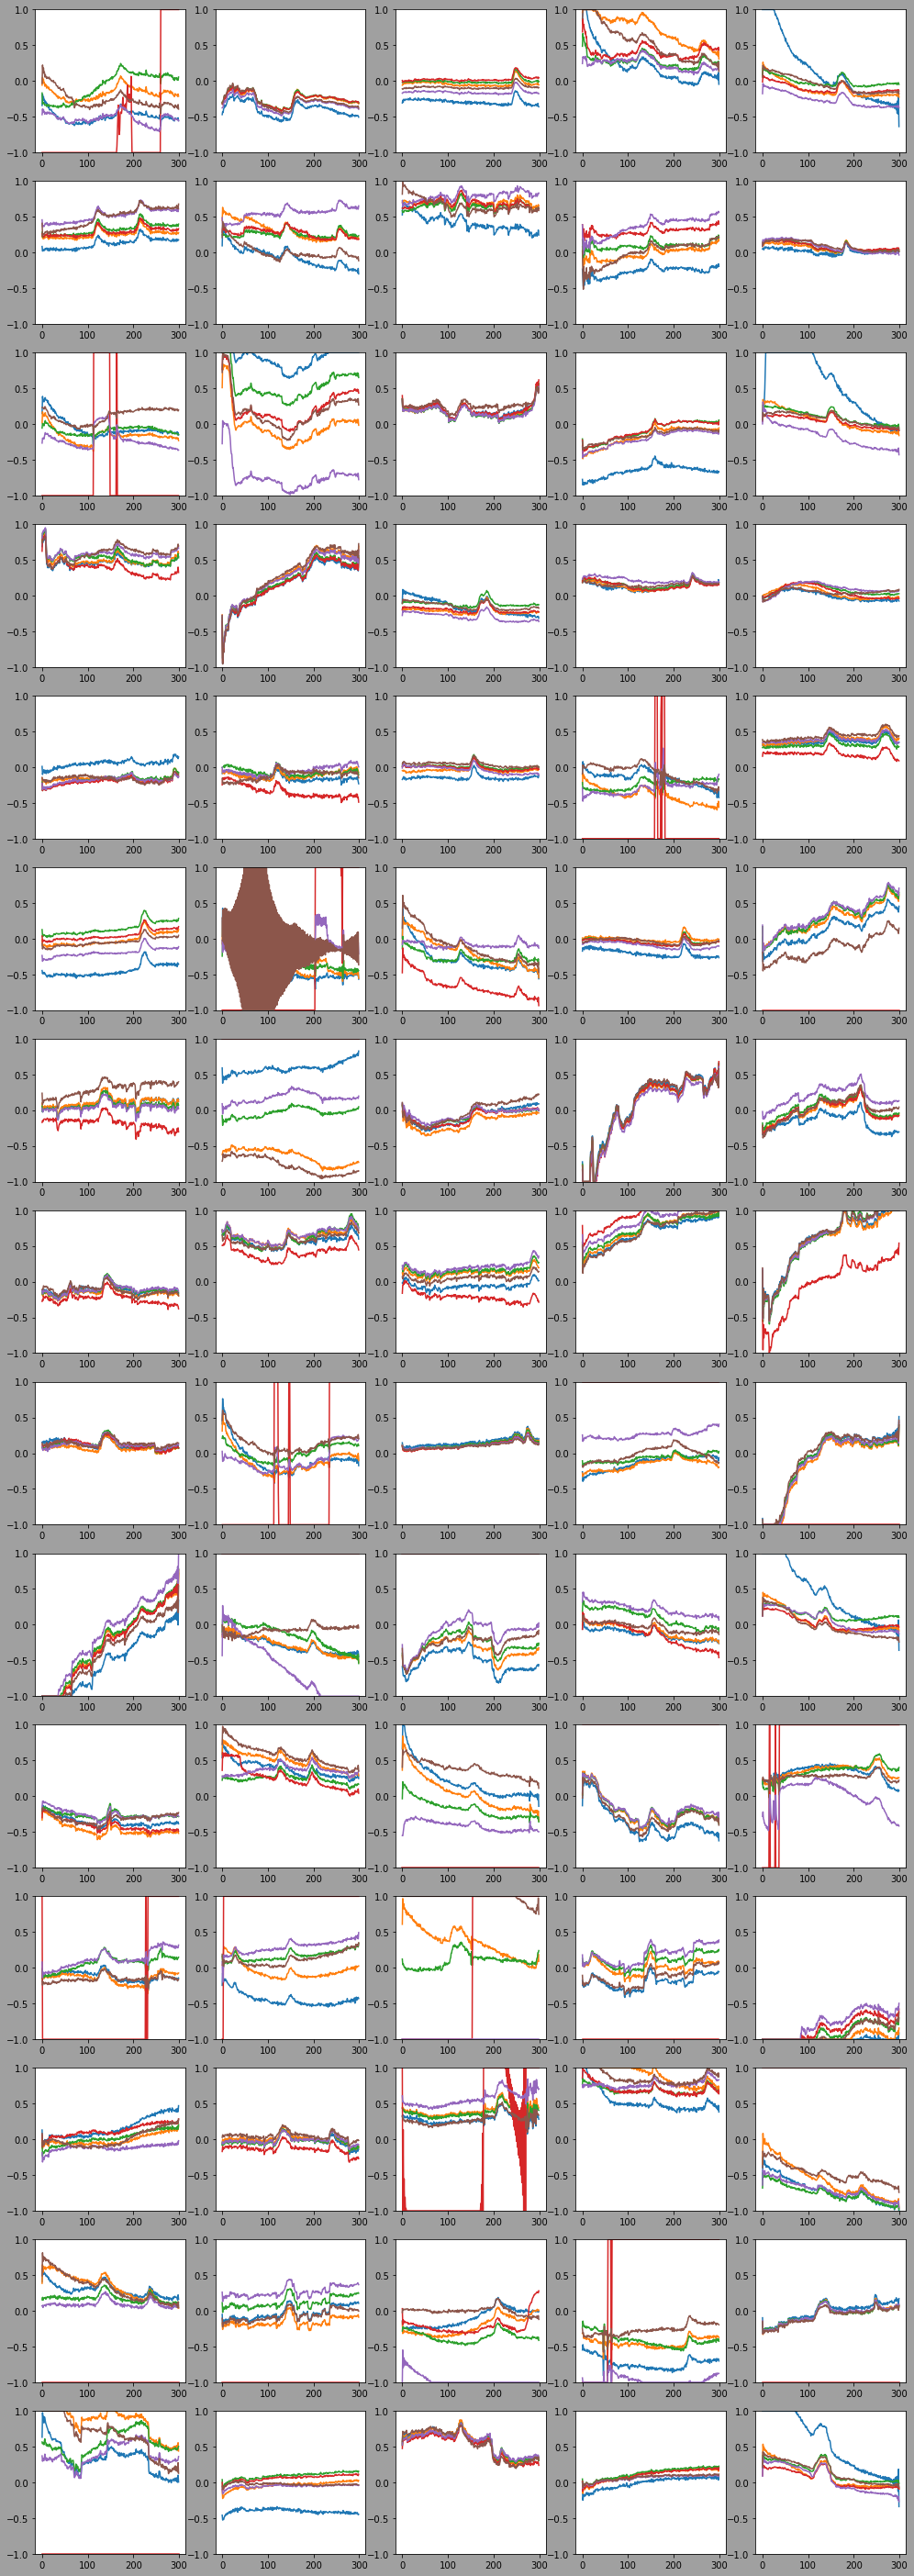

In [23]:
np.random.shuffle(records['Rest'])
showMe(records['Rest'][:100])

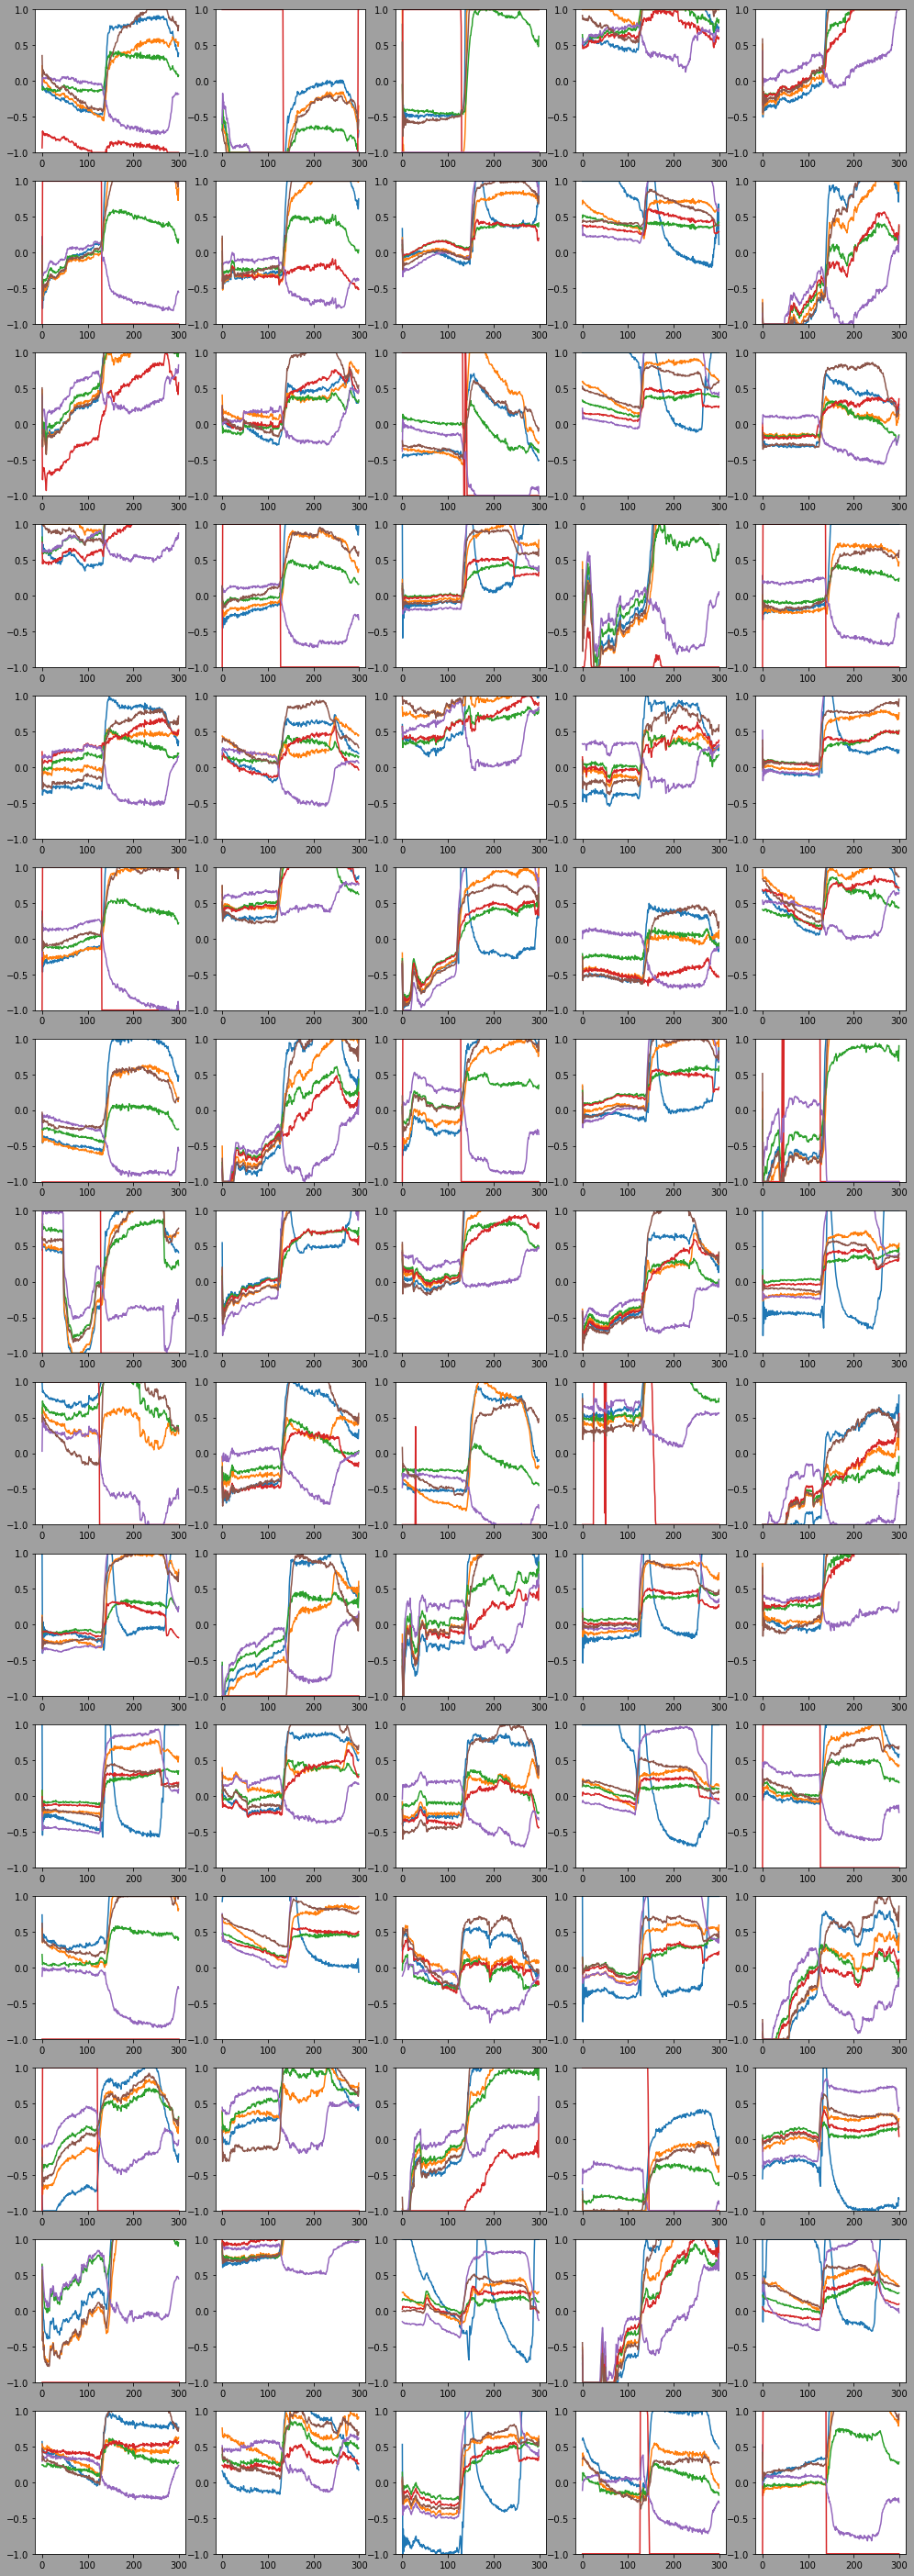

In [24]:
np.random.shuffle(records['Eyebrow'])
showMe(records['Eyebrow'][:100])

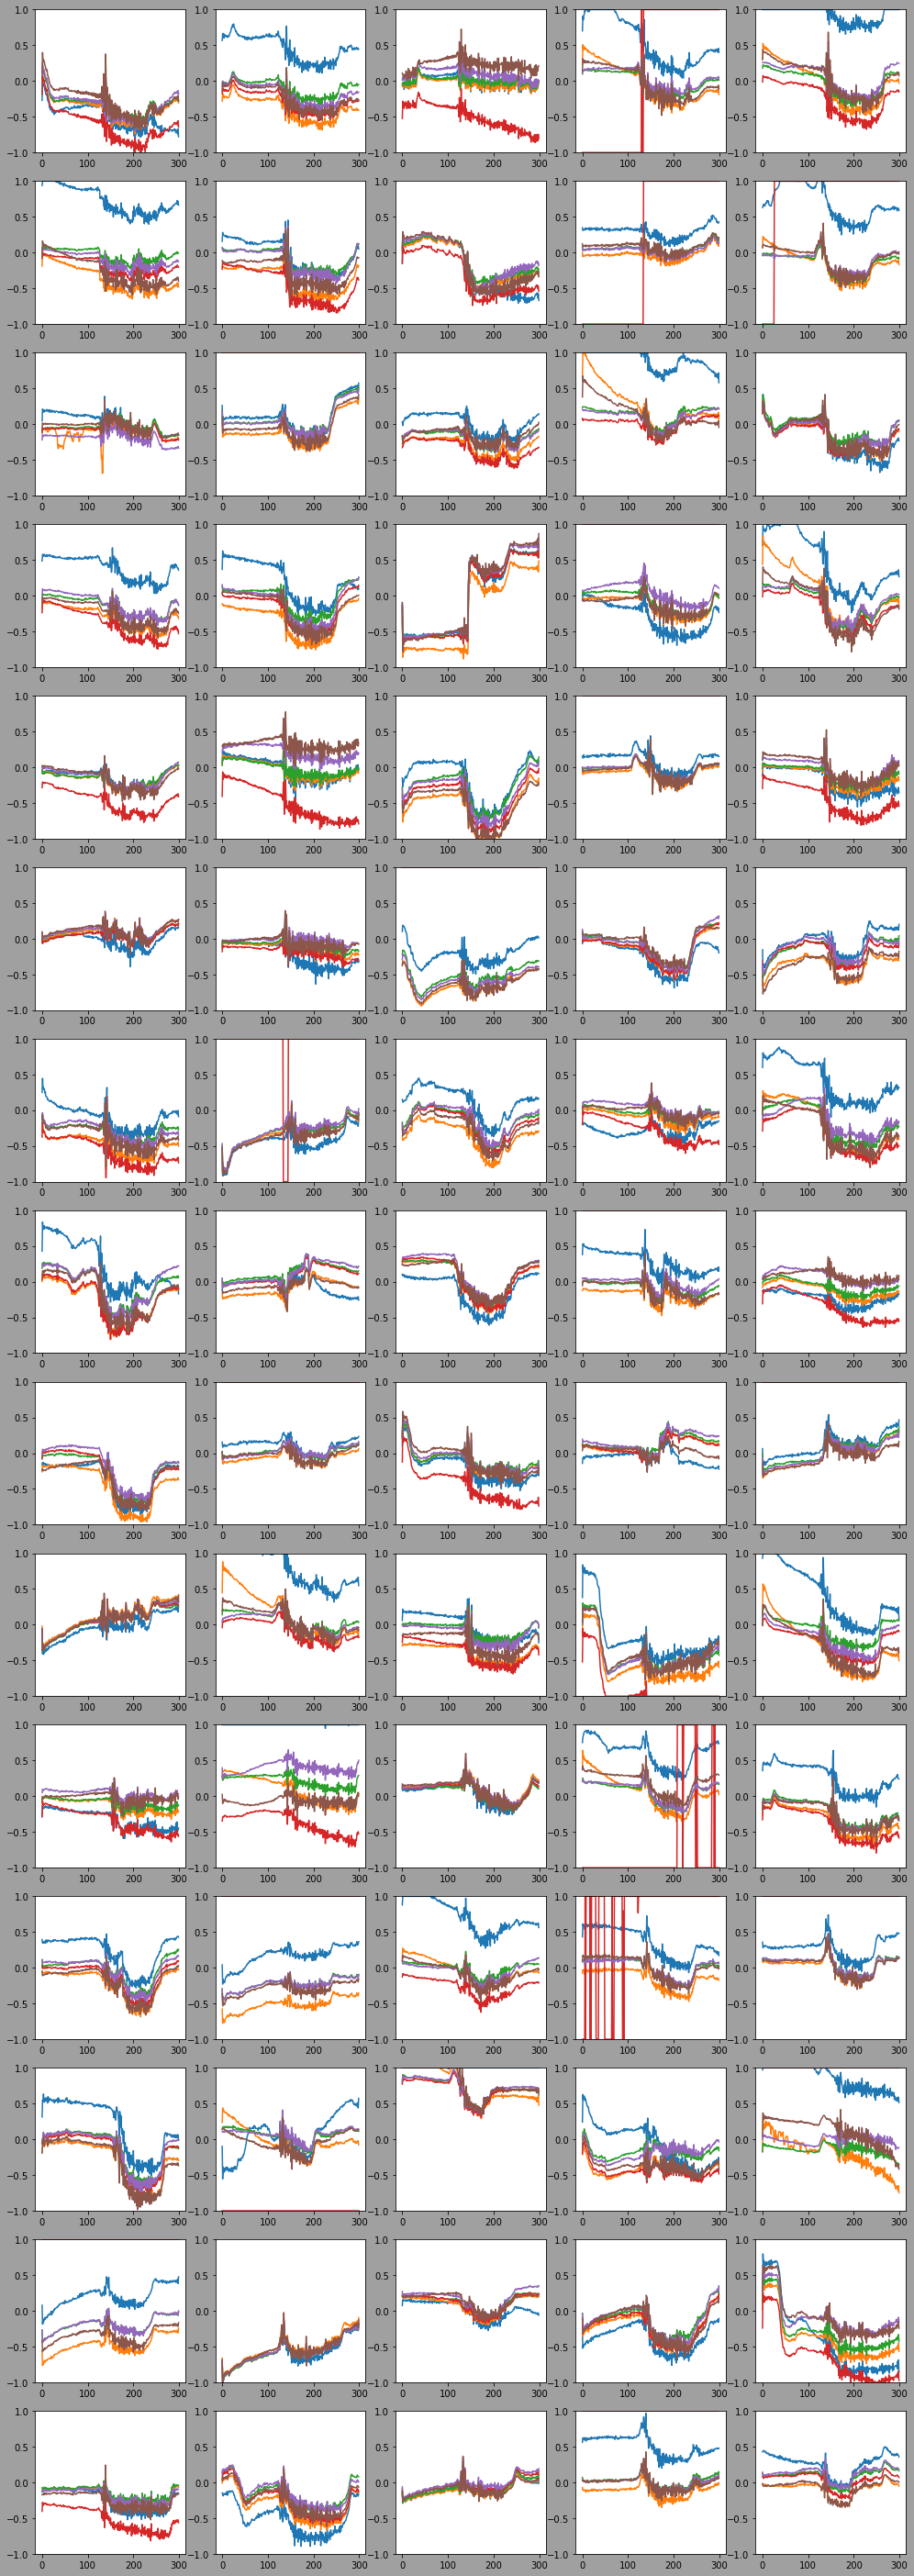

In [18]:
np.random.shuffle(records['Chew'])
showMe(records['Chew'][:100])

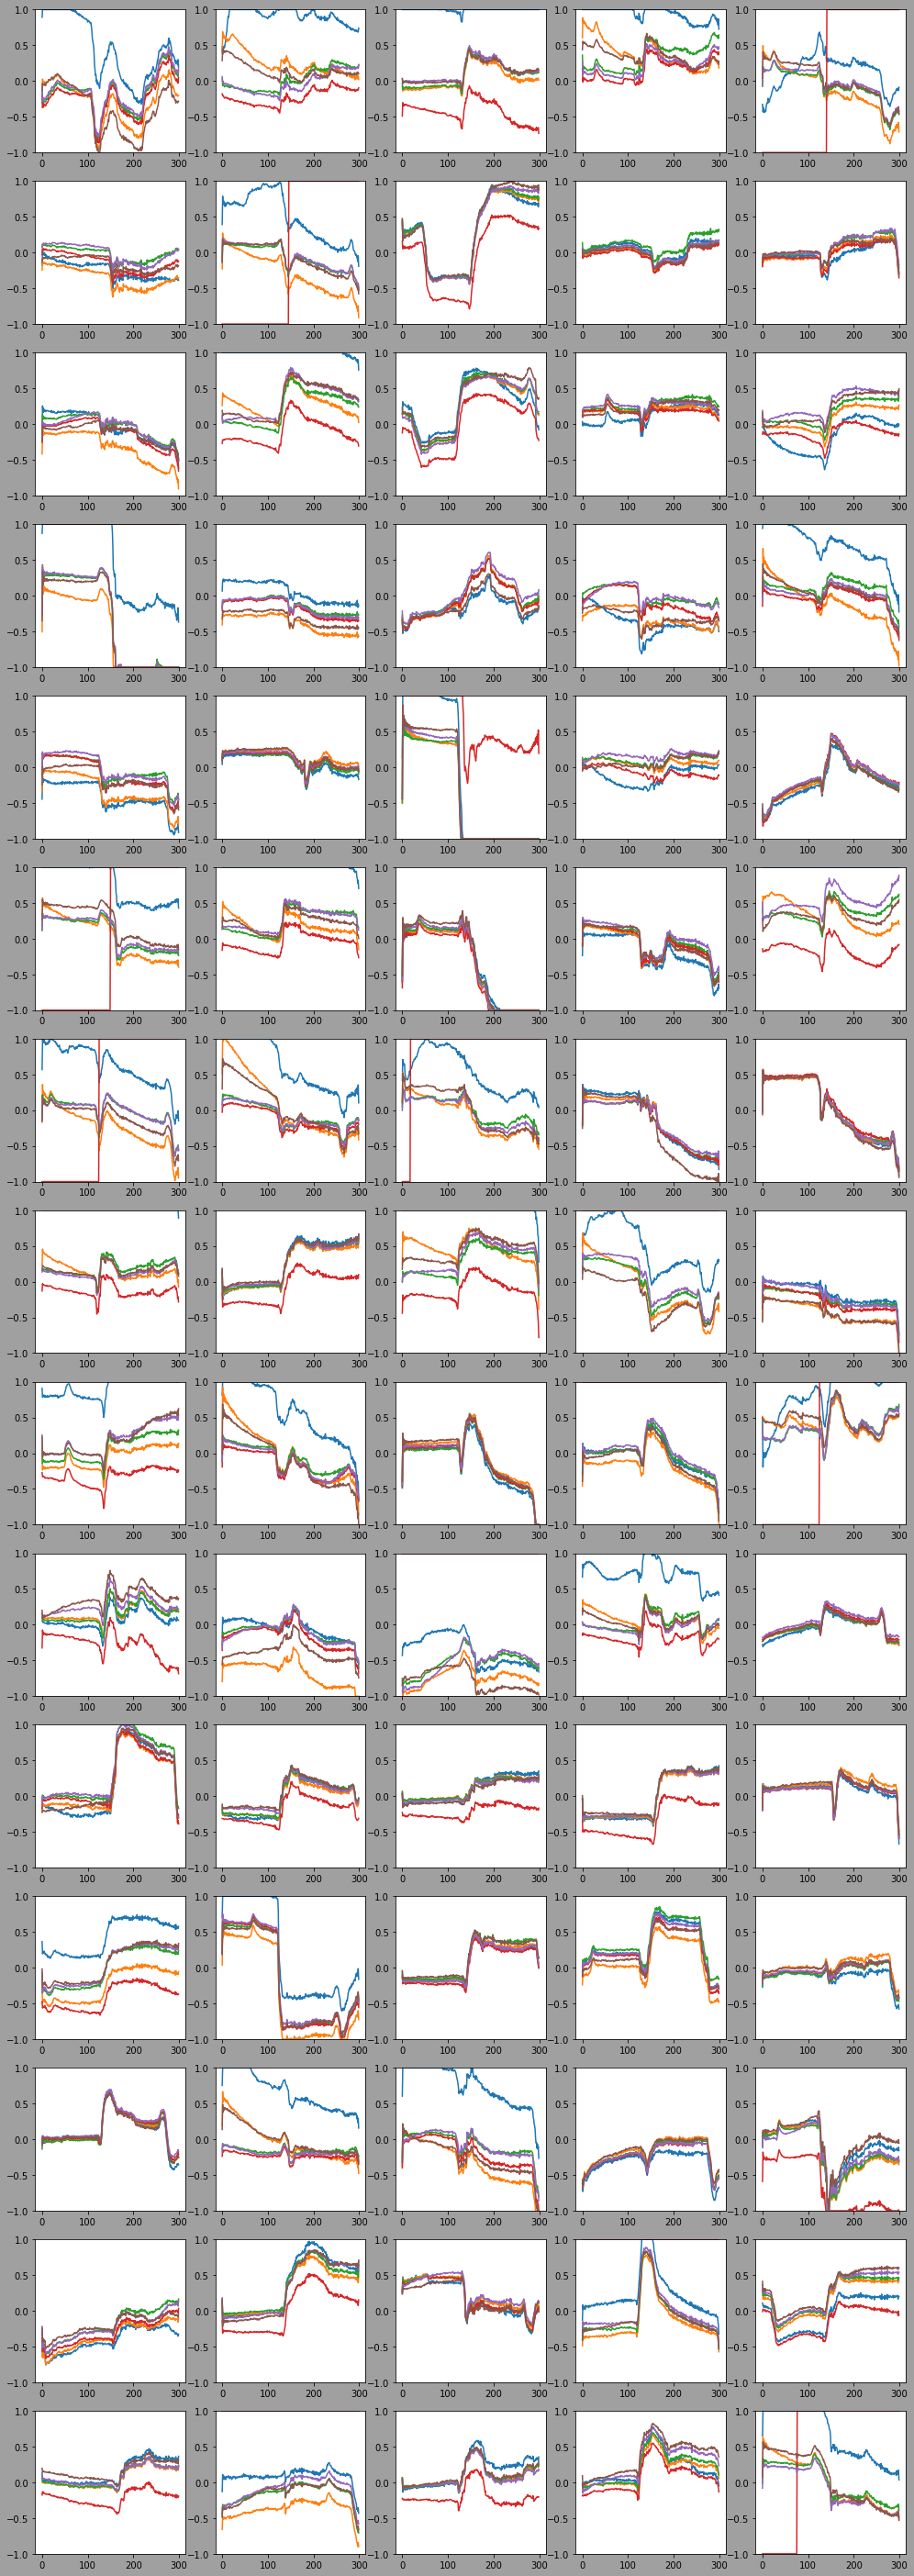

In [19]:
np.random.shuffle(records['Smile'])
showMe(records['Smile'][:100])